## Imports

In [1]:
import matplotlib.pyplot as plt
import socket
import glob
import os
import numpy as np
import tensorflow as tf
from keras.models import Model
from keras.optimizers import RMSprop
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D,concatenate,Conv2DTranspose
from glob import glob
import skimage
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model


C:\Users\bryan\Miniconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\bryan\Miniconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\bryan\Miniconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\bryan\Miniconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

## Importing dataset of fingerprint images

In [ ]:
!git clone https://github.com/BryantSmith91/MoreFinalData.git

### Preparing data for Machine Learning Process

In [2]:
data = glob('MoreFinalData/*')
len(data)

6000

In [3]:
matrix = []
array = []

for x in range(0, len(data)):
    image_size =(224,224)
    im = image.load_img(data[x], target_size=image_size, color_mode='grayscale')
    matrix.append(im)
    array.append(skimage.img_as_float(matrix[x]))
imagearray = np.asarray(array)

In [4]:
imagearray = imagearray.reshape(-1, 224,224, 1)

In [5]:
batch_size = 52
epochs = 50
inChannel = 1
x, y = 224, 224
input_img= Input(shape=(x,y,inChannel))

W0822 14:11:37.495645 12952 deprecation_wrapper.py:119] From C:\Users\bryan\Miniconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0822 14:11:37.511615 12952 deprecation_wrapper.py:119] From C:\Users\bryan\Miniconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



In [6]:
from sklearn.model_selection import train_test_split


train_X, real_X, train_ground, real_ground = train_test_split(imagearray, imagearray, 
                                                    test_size=0.2,
                                                    random_state=13)

In [7]:
real_X.shape
train_X.shape

(4800, 224, 224, 1)

## Machine Learning Model

In [8]:
def autoencoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3) #7 x 7 x 64
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3) #7 x 7 x 256
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
   
    #decoder
    
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)
    up1 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv6), conv4], axis=3)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(up1)
    up2 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv7), conv3], axis=3)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(up2)
    up3 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv8), conv2], axis=3)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(up3)
    up4 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv9), conv1], axis=3)
    conv10 = Conv2D(32, (3, 3), activation='relu', padding='same')(up4)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(conv10)
    return decoded

In [9]:
autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())

W0822 14:12:29.554940 12952 deprecation_wrapper.py:119] From C:\Users\bryan\Miniconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0822 14:12:29.567917 12952 deprecation_wrapper.py:119] From C:\Users\bryan\Miniconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0822 14:12:29.729117 12952 deprecation_wrapper.py:119] From C:\Users\bryan\Miniconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [10]:
autoencoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 224, 224, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 112, 112, 32) 0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 112, 112, 64) 18496       max_pooling2d_1[0][0]            
__________________________________________________________________________________________________
max_poolin

In [11]:
autoencoder_train = autoencoder.fit(train_X, train_ground,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(real_X, real_ground))

W0822 14:12:54.637848 12952 deprecation_wrapper.py:119] From C:\Users\bryan\Miniconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0822 14:12:54.643348 12952 deprecation_wrapper.py:119] From C:\Users\bryan\Miniconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 4800 samples, validate on 1200 samples
Epoch 1/50
4800/4800 [==============================] - 58s 12ms/step - loss: 0.0393 - val_loss: 0.0079
Epoch 2/50
4800/4800 [==============================] - 50s 10ms/step - loss: 0.0051 - val_loss: 0.0032
Epoch 3/50
4800/4800 [==============================] - 49s 10ms/step - loss: 0.0030 - val_loss: 0.0036
Epoch 4/50
4800/4800 [==============================] - 51s 11ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 5/50
4800/4800 [==============================] - 51s 11ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 6/50
4800/4800 [==============================] - 52s 11ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 7/50
4800/4800 [==============================] - 52s 11ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 8/50
4800/4800 [==============================] - 52s 11ms/step - loss: 0.0012 - val_loss: 8.3005e-04
Epoch 9/50
4800/4800 [==============================] - 51s 11ms/step - loss: 9.9976e-04 - val_loss: 8.0208e-04
Epoc

In [14]:
autoencoder.save('FinaProjectReady.h5')

In [ ]:
autoencoder = load_model('FinaProjectReady.h5')

### Graphing Training and Validation Loss

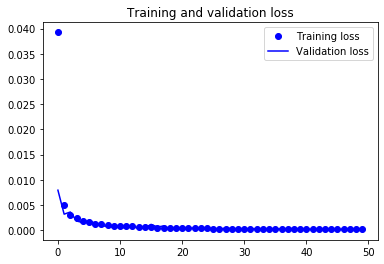

In [13]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(50)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Running the Predictions

In [15]:
pred = autoencoder.predict(real_X)

#### Reconstructing Validation Prints

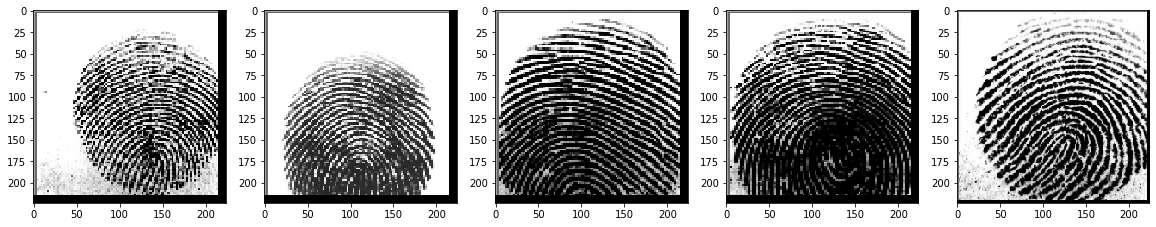

In [16]:
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(pred[i,...,0],cmap='gray')
plt.show()

#### Displaying Original Validation Print Image

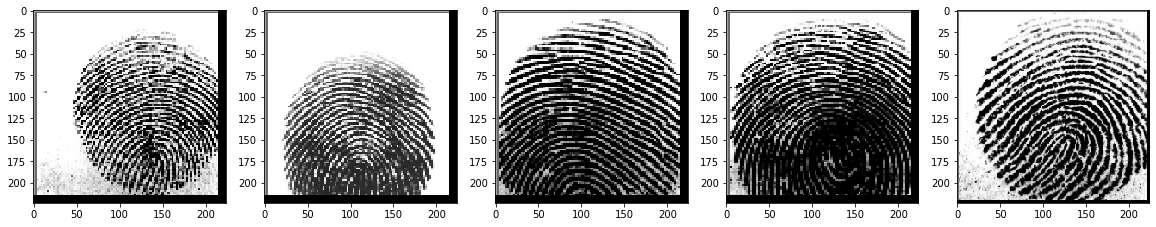

In [18]:
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(pred[i,...,0],cmap='gray')
plt.show()

## Reconstructing fingerprints not in dataset

In [ ]:
testprints = glob('TestPrints/*')
len(testprints)

In [ ]:
matrix = []
array = []

for x in range(0, len(data)):
    image_size =(224,224)
    im = image.load_img(data[x], target_size=image_size, color_mode='grayscale')
    matrix.append(im)
    array.append(skimage.img_as_float(matrix[x]))
testprints = np.asarray(array)
testprints = testprints.reshape(-1, 224,224, 1)

In [ ]:
pred = autoencoder.predict(testprints)

### Test Fingerprints

In [ ]:
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(pred[i,...,0],cmap='gray')
plt.show()

### Real Fingerprints

In [ ]:
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(testprints[i,...,0],cmap='gray')
plt.show()